# Intro to Scikit-learn

Prepared by Chris Frohmaier

Content inpired by PyData talks by Jake Van der Plaas

Scikit-learn is written in Python is one of th emost widely adopted machine learning libraries in use in both academic and industrial settings. It provides a consistent interface when dealing with AI, ML, and statistical analysis on datasets

Scikit-learn provides many of the tools needed to cover future topics you'll come across in the Advanced Computing Techniques course, e.g. there are modules for performing regression, classification, clustering, dimensional reduction, etc, etc.

Common Python libraries, such as NumPy, SciPy, Pandas, and Matplotlib all form the foundation of Scikit-learn, making it easy to implement in already exisiting pipelines.

## Loading Data into Scikit-learn and Python

Scikit-learn comes with several example datasets that are useful when learning how the library works.

Alternatively, data can be loaded through a different library, e.g. Pandas, and still interact with Scikit-learn.

Let's load the famous dataset "Iris" by Ronald Fisher in 1936, for demonstration purposes, we'll use both the pre-built Scikit-learn and with Pandas. 

In [1]:
import pandas as pd #import the Pandas library
from sklearn import datasets #Load the scikit-learn datasets library

In [2]:
## Pandas can load CSV files either from a local file, or a URL to an online dataset.
## CSV stands for 'Comma Separated Values', each comma represents a new column for the row.
iris_pd = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv') 


## We will not use the Iris dataset in Scikit-learn format, but be aware it is already prepared into samples and target arrays (as we will see later)
iris_skl = datasets.load_iris() #Loading the Iris dataset from Scikit-learn



In [3]:
iris_pd.head() # Show the start of the Pandas Dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In this data each row refers to a single flower observed by Ronald Fisher and is often called a sample. In Scikit-learn and Machine Learning Language, the total number of rows is referred to as `n_samples`.

Each column refers to a different piece of information that describes the row/sample and is called a feature. Therefore, the number of columns in the table is called `n_features`.

Also be aware that the phrase of matrix and table are used interchangably. 

## Features Matrix

Our data can be thought of as a 2D matrix or array, called the _features matrix_.

The shape of this array is `[n_samples, n_features]`.

By convention, the features matrix is given the variable `X`.

## Target array

Along with our features matrix, we also work with a set of labels or _target array_. By convention, given the variable `y`. This array is usually a 1D array of length == `n_samples`. This array can be made of continuous numerical values, or be a set of labels or discrete classess. It is possible of Scikit-learn to also use a 2D array of targets, where a single row can have multiple labels, but we won't be working with that in this class.

When we come to split our data into test and training data, it is the target array we want to be able to statistically predict based on the features in our training data.

## Iris dataset

Perhaps it would be nice if we could predict the variety of flower Ronald Fisher observed based on the measurements taken in other columns

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #We'll use seaborn for some data visualisation

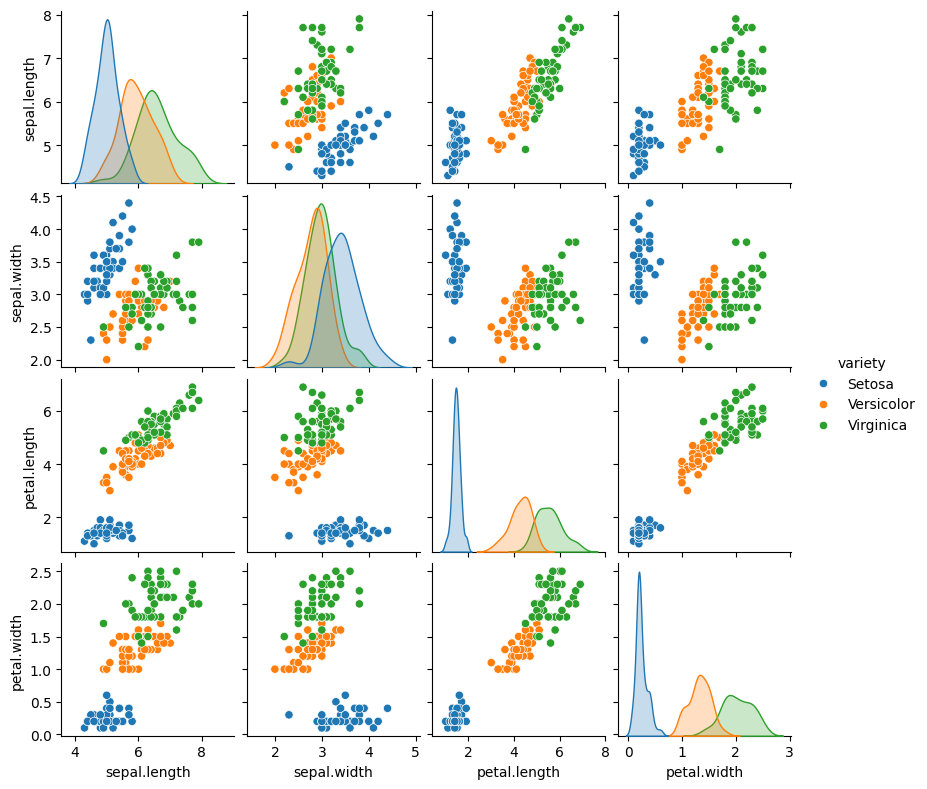

In [5]:
sns.pairplot(iris_pd, hue='variety', height=2)

## Preparing the data

Given that our features are usually called `X` and targets `y`, let's split the data.

In [6]:
X = iris_pd.drop('variety', axis=1)
y = iris_pd['variety']

In [7]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Linear Regression

Here we are going to use the Iris dataset to perform a linear regression using both the Gradient Descent method we covered in the lecture and then using the Scikit-learn in-built method.

Note: We will not use linear regression to gain any insight into the Iris dataset, this is just a learning exercise.

## Exercise 1

Using the gradient descent method we ran through in the previous lecture. Perform a linear regression to any two features in the Iris dataset.

Use the Mean Squared Error as your loss function.

The code for gradient descent can be found on Moodle, adapt it for this example.

## The Scikit-learn method

For a linear regression, we will be using the Scikit-Learn estimator API. The steps to follow genericall for any estimator task are as follows:

1. Choose an appropriate estimator class from Scikit-learn
2. Choose model hyperparameters when the class is initiated
3. Arrange data into a features matrix and a target vector following the method presented in this notebook
4. Fit the model using the `fit()` method.
5. Apply the model to the new data.
  - For supervised learning to predict the labels we use `predict()` method
  - For unsupervised we can transform or infer properties of the data using `transform()` or `predict()`

### Step 1: Choose the class.

Since we are performing a simple linear regression, we can import the Linear Regression class

In [8]:
from sklearn.linear_model import LinearRegression

 You can read about other linear models [here](https://scikit-learn.org/stable/modules/linear_model.html)

### Step 2: Choose hyperparameters

The class of a model is not the same as an instance of the model. We can initiate multiple instance of a class with different hyperparameters if we so wish.

- Depending on our model class (read the documentation for different models!), we may want to do the following: 
- Would we like to fit for the offset (i.e., y-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These choices we face are called hyperparameters, and are made when the class is initiated.

Let's create a model using `LinearRegression` we just imported, and use the `fit_intercept` hyperparameter.

In [9]:
model = LinearRegression(fit_intercept=True)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 3: Arrange our data into a features matrix and a target vector.

We previously covered this in the notebook a few cells above. But for this example, let's use the `petal.length` as our feature, and `petal.width` as our target.

We do need to manipulate our samples table before we can use it, recall that Scikit-learn requires a matrix of size `[n_samples, n_features]`. In our case, we reshape the 1D array e.g. `iris_pd['petal.length']` into a 2D array

In [10]:
X_example = iris_pd['petal.length'].values[:, np.newaxis]
y_example = iris_pd['petal.width']

In [11]:
X_example.shape

(150, 1)

### Step 4: Fit the model to the data 


In [12]:
model.fit(X_example, y_example)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The `fit()` command runs background computations in the Scikit-Learn library with the results in the model specific attributes.

*Important Note:* In Scikit-learn convention, all model parameters that were learned during `fit()` have trailing underscores in their names.
For example:


In [13]:
model.coef_ #The gradient (m)

array([0.41575542])

In [14]:
model.intercept_ #The intercept (c)

np.float64(-0.36307552131902976)

## Compare to the gradient descent

Compare your result to gradient descent. Do they agree?

#### Interpreting the result

What about the uncertainty on our fit?

In general, Scikit-learn does not perform an uncertainty analysis - that would be more in the domain of statistics than machine learning.

In Machine Learning, we focus more on what the model predicts.

### Step 5: Predictions from the model

We can now use the model to create predictions that we can use to evaluate new data not part of the training. We can achieve this using `predict()`.

So that we can plot our result, lets feed in a new series of x points and predict the y values.

In [15]:
x_fit = np.linspace(0,8,20) #Create 20 points between 0 and 8

Remember, we need to manipulate our data into an `[n_samples, n_features]` matrix

In [16]:
X_fit = x_fit[:,np.newaxis]

In [17]:
y_fit = model.predict(X_fit)

### Plot our results

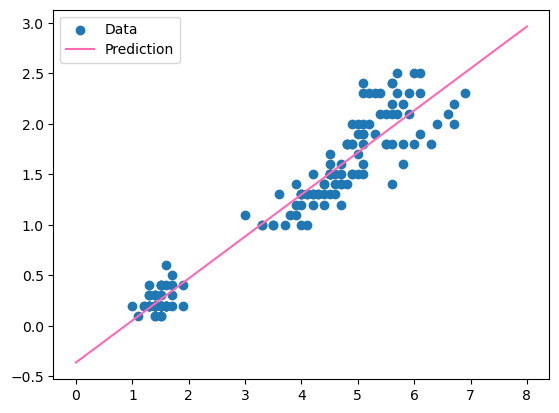

In [18]:
plt.scatter(X_example, y_example, label='Data')
plt.plot(X_fit, y_fit, label='Prediction', color='hotpink')

plt.legend()

# Supervised Learning

We're making progress into the world of Scikit-learn. Let's go one step futher now and create a model that can predict the variety of flower based on our features matrix.

For this example, we will use a very simple generative model called a 'Gaussian naive Bayes'. This model assumes that each class is from from a Gaussian distribution. We won't spend time on the details of this model, but the interested reader can explore [Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html) for more information.

Naive Bayes is a good starting point because the model has no hyperparameters, as a result, it can be evaluated extremely quickly. It is advisable to start simple, and then build complexity.

## Train test split.

When we come to evaluate model performance, we should use data that then model hasn't seen before. We could, of course, do this manually, but Scikit-learn has an inbuilt routine called `train_test_split`.

In [31]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=23) 
# test_size determines the fraction of data that will go into the test set

Let's now run through the usual steps

In [44]:
#Step 1: Choose the model
from sklearn.naive_bayes import GaussianNB 

#Step 2: Inititate the model and choose hyperparameters 
model = GaussianNB()              

#We have already done step 3 above

#Step 3: Fit the model to the data
model.fit(Xtrain, ytrain)

#Step 5: Make predictions
y_model = model.predict(Xtest)  

We can use `accuracy_score` to see the fraction of predicted labels that match the truth.

In [45]:
from sklearn.metrics import accuracy_score


In [48]:
ascore = accuracy_score(ytest, y_model)

In [52]:
print(f'The model is {ascore:.3f} accurate. Not bad!')

The model is 0.947 accurate. Not bad!


# Final demo: Hand-written digits

OK, we have learned some interesting concepts, so let's now apply it to image classification.

We'll use a common dataset for ML education, the UCI ML hand-written digits datasets: [https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits)

Luckily, Scikit-learn has this inbuilt and formatted into somethign friendly!

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In this dataset, we have 1,797 images of hand-written numbers, these numbers are displayed in an 8x8 pixel image.

Let's visulaise some numbers

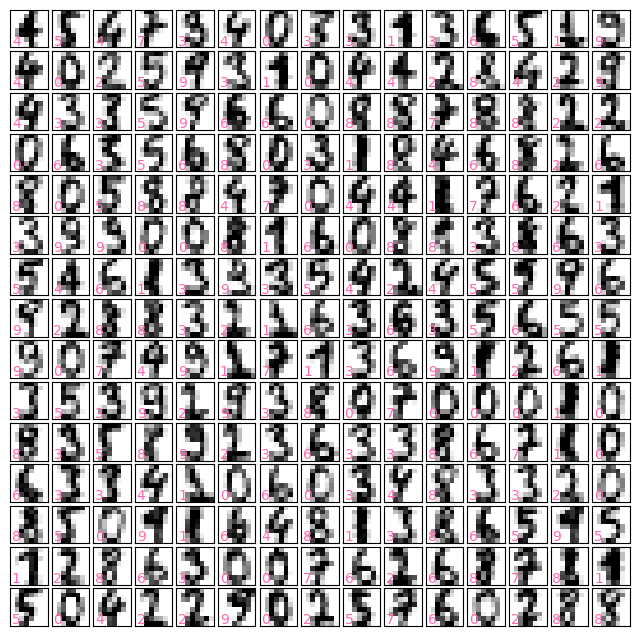

In [61]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(15, 15, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    randomNumber = np.random.randint(0,digits.images.shape[0]) #Pick a random sample to show
    ax.imshow(digits.images[randomNumber], cmap='grey_r') # Display the 8x8 pixel image
    ax.text(0.05, 0.05, str(digits.target[randomNumber]),
            transform=ax.transAxes, color='hotpink') #Show the truth as text in the corner

Remember, the data need to be in the 2D matrix format, `[n_samples, n_numbers]`. This can be achieved by considering each pixel as a feature so that we havea  single table/matrix with 1,797 rows and 8x8=64 columns.

We also need a target array with our truth labels. Scikit-learn has already done this for us and called them `.data` and `.target` in the dataset.

In [62]:
X_digits = digits.data

In [63]:
y_digits = digits.target

### Mini exercise
Check the arrays are the right shape before continuing.

# Exercise 2: Build a classifier

Your task in this exercise is to train a classifer on the digits data to predict what digit has been written. Start by using naive Bayes again, just as before, but I strongly encourage you to explore [other models in the Scikit-learn family](https://scikit-learn.org/stable/supervised_learning.html).

Task:

1. `train_test_split` the digits data
2. Use a naive_bayes model
3. Fit the training data
4. Predict based on the test data
5. Evaluate your model predictions
6. Make an output grid of a sample of digits in the test data. Plot in the corner the predicted label.